# Demonstrating the Gini Coefficient:
## Spatial Inequality in Mexico: 1940-2000

1. Imports & Input Data
2. Classic Gini Coefficient
3. Spatial Gini Coefficient

-------------------------

### 1. Imports & Input Data

In [69]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-12-02T11:43:47.151240-08:00

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.30.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.1.0-22-amd64
Machine     : x86_64
Processor   : 
CPU cores   : 20
Architecture: 64bit



In [70]:
import geopandas
import inequality
import libpysal
import matplotlib.pyplot as plt
import numpy

In [71]:
%watermark -w
%watermark -iv

Watermark: 2.5.0

pandas    : 2.2.3
geopandas : 1.0.1
IPython   : 8.30.0
numpy     : 2.1.2
inequality: 0.1.dev217+g3354455.d20241010
libpysal  : 4.12.1
matplotlib: 3.9.2
scipy     : 1.14.1



In [72]:
libpysal.examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [73]:
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

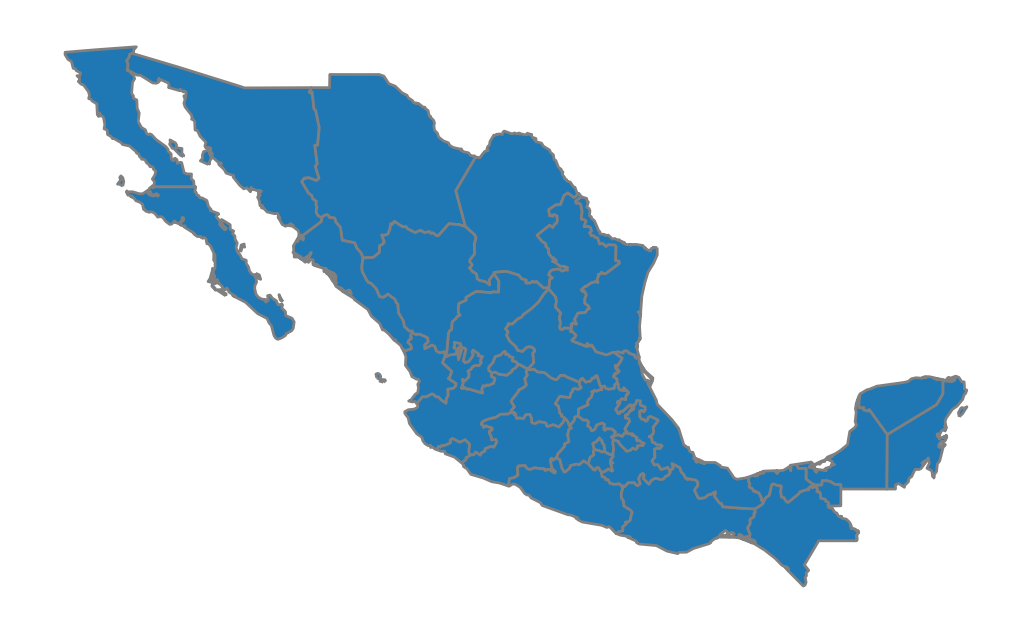

In [74]:
ax = gdf.plot(edgecolor='grey')
ax.set_axis_off()

In [75]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.5249 21.85664, -101.5883 21.772..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.8462 22.01176, -101.9653 21.883..."


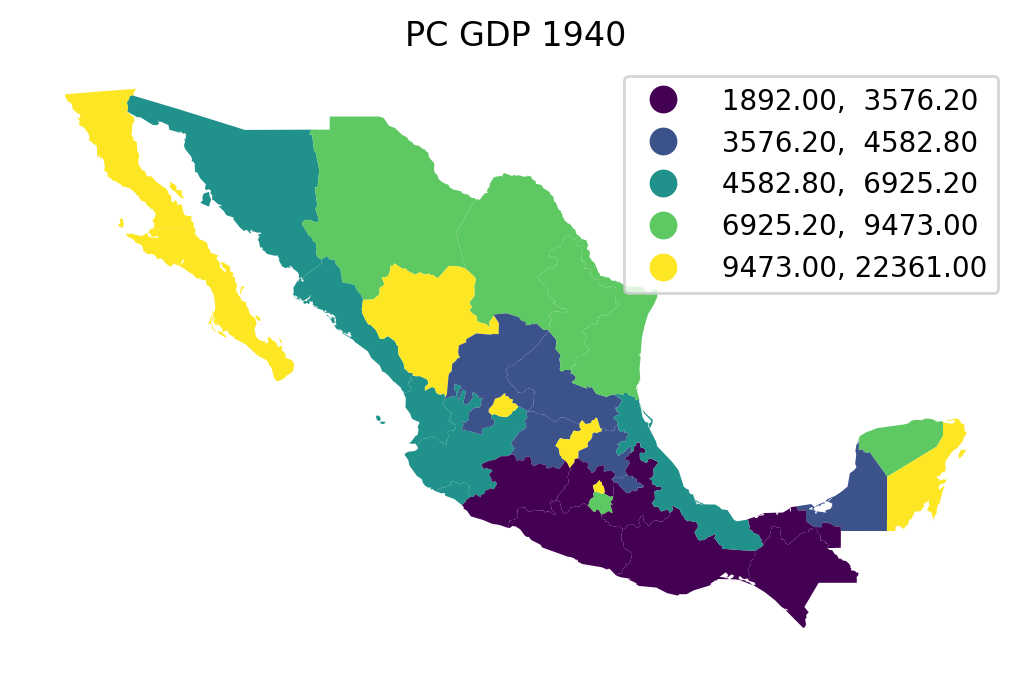

In [76]:
ax = gdf.plot(column="PCGDP1940", k=5, scheme="Quantiles", legend=True)
ax.set_axis_off()
ax.set_title("PC GDP 1940");
# plt.savefig("1940.png")

------------------------------------------------

### 2. Classic Gini Coefficient

The Gini coefficient can be expressed as the relative mean absolute difference in incomes between pairs of observations:
$$G = \frac{\sum_i \sum_j \left| x_i - x_j \right |}{2\bar{x}n^2}$$
where $x_i$ is the per capita income of area $i$, $\bar{x}$ is the mean of the area per capita incomes, and $n$ is the number of areas.

The numerator, $\sum_i \sum_j \left | x_i - x_j \right |$ is a measure of inequality in the data set. The Gini normalizes this measure relative to the mean income and the number of pairwise comparisons. As a result of the normalization, the Gini coefficient is bounded between 0 (perfect equality) and 1 (maximum inequality).

Focusing on 1940, the Gini coefficient for Mexican state per capita income is:

In [77]:
gini_1940 = inequality.gini.Gini(gdf["PCGDP1940"])
gini_1940.g

np.float64(0.3537237117345285)

In [78]:
decades = range(1940, 2010, 10)
decades

range(1940, 2010, 10)

In [79]:
ginis = [inequality.gini.Gini(gdf["PCGDP%s" % decade]).g for decade in decades]
import pandas as pd
ginis_df = pd.DataFrame(data=ginis, columns=['Gini'], index = list(decades))

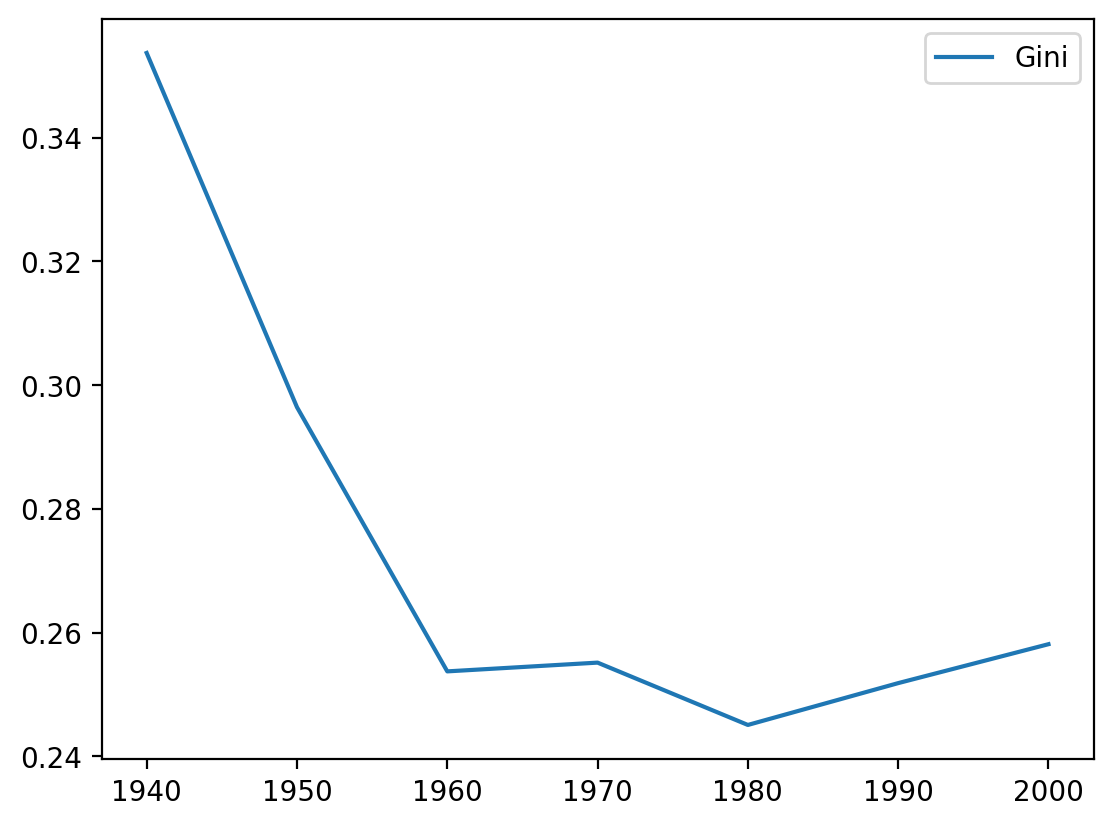

In [80]:
ginis_df.plot();

Interpretation XXX


Spatial invariance

--------------------------------------

### 3. Spatial Gini Coefficient

To introduce the spatial dimension into the analysis of income inequality, the spatial Gini makes use of a decomposition of the numerator of the Gini:

$$ \sum_i \sum_j \left | x_i - x_j \right | = \sum_i \sum_j  \gamma_{i,j} \left | x_i - x_j \right | +   \sum_i \sum_j(1-\gamma_{i,j}) \left | x_i - x_j \right |$$

where $\gamma_{i,j}$ is a binary indicator taking on a value of 1 if areas $i$ and $j$ are considered spatial neighbors, and 0 otherwise. 
The first term in the decomposition is the contribution to overall inequality due to inequality between pairs of spatial neighbors, while the second term is the contribution due to inequality between pairs of "distant" observations.

The relative contribution of these two inequality components will be a function of two factors:
- the number of neighboring (distant) pairs
- the inequality between each set of pairs



In [81]:
inequality.gini.Gini_Spatial

inequality.gini.Gini_Spatial

In [82]:
wq = libpysal.weights.Queen.from_dataframe(gdf)

/tmp/ipykernel_891467/40166334.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(gdf)


In [83]:
numpy.random.seed(12345)
gs = inequality.gini.Gini_Spatial(gdf["PCGDP1940"], wq)
gs.p_sim

np.float64(0.01)

In [84]:
gs.wcg

np.float64(4735906.0)

In [85]:
wq.pct_nonzero

13.4765625

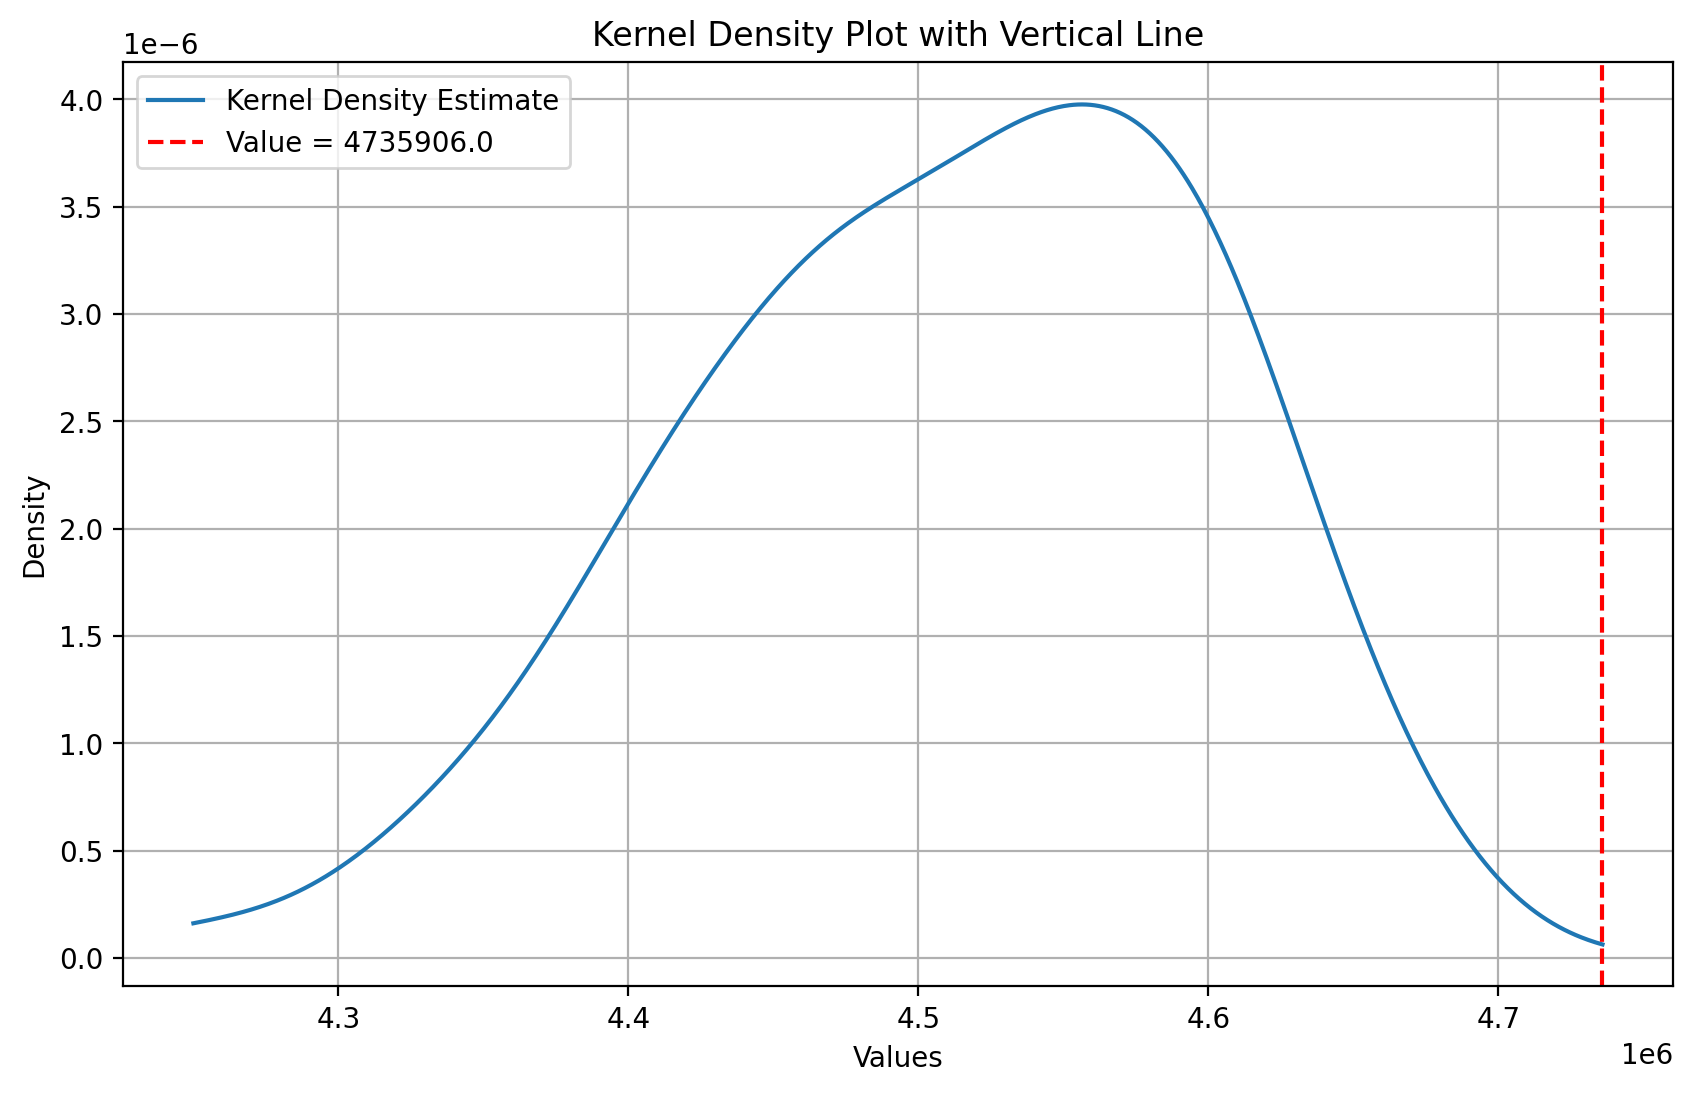

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data array
data = gs.wcgp

obs = gs.wcg

# Kernel Density Estimation
kde = gaussian_kde(data)
maxd = max(max(data), obs)
x_range = np.linspace(min(data), maxd, 1000)
kde_values = kde(x_range)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='Kernel Density Estimate')
plt.axvline(x=obs, color='red', linestyle='--', label=f'Value = {obs}')
plt.title("Kernel Density Plot with Vertical Line")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
gs.wcgp.mean()

np.float64(4510351.818181818)

In [88]:
regimes = gdf["HANSON98"]

In [89]:
wb = libpysal.weights.block_weights(regimes, silence_warnings=True)
wb

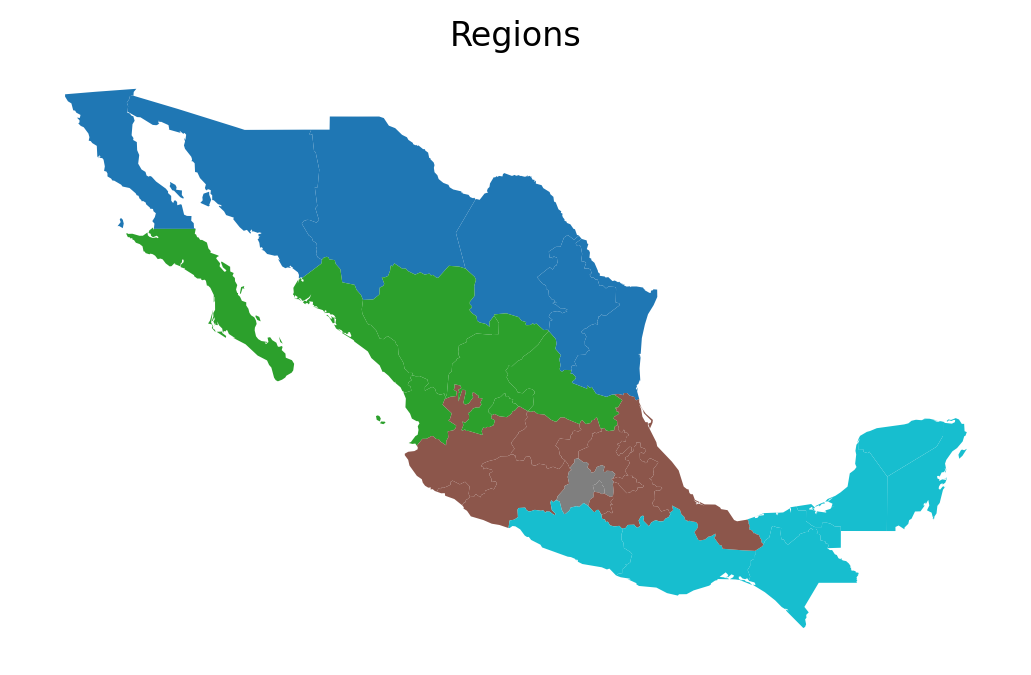

In [90]:
ax = gdf.plot(column="HANSON98", categorical=True)
ax.set_title("Regions")
ax.set_axis_off()
# plt.savefig("regions.png")

In [91]:
numpy.random.seed(12345)
gs = inequality.gini.Gini_Spatial(gdf["PCGDP1940"], wb)
gs.p_sim

np.float64(0.01)

In [92]:
wb.pct_nonzero

20.1171875

In [93]:
gs.wcg

np.float64(4353856.0)

In [94]:
gs.wcgp.mean()

np.float64(4156997.4545454546)

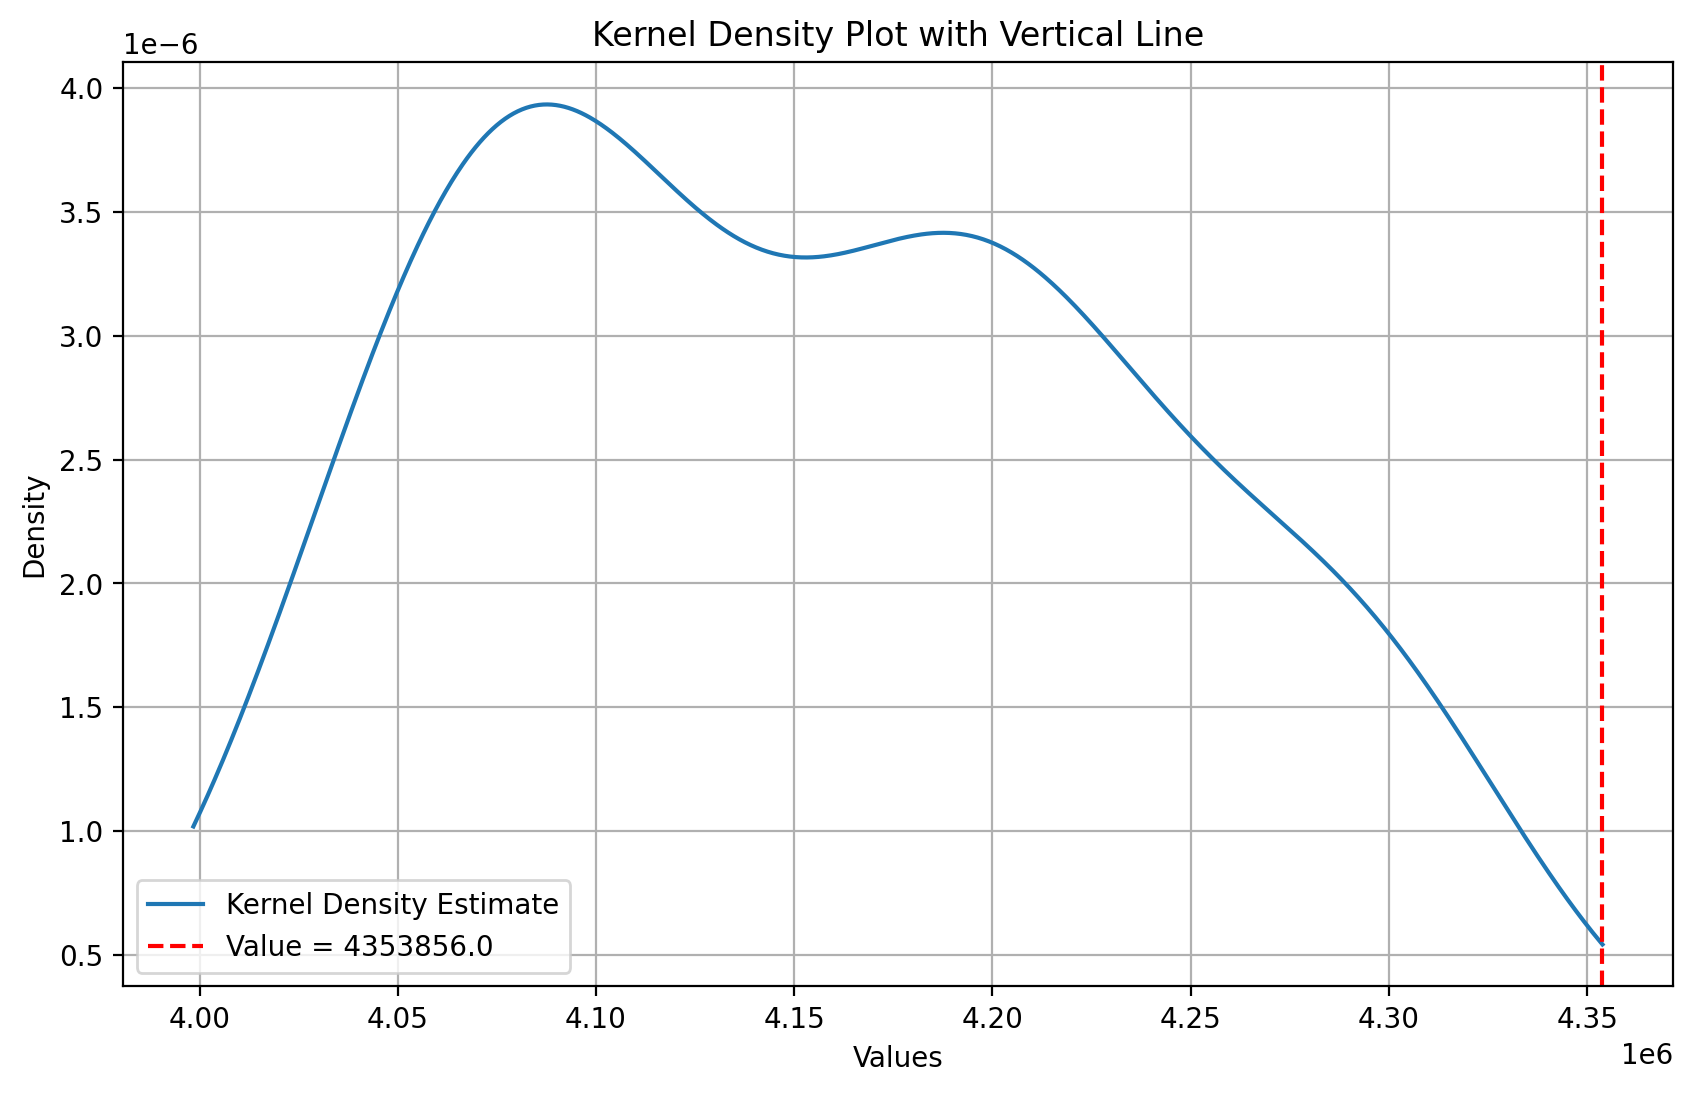

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data array
data = gs.wcgp

obs = gs.wcg

# Kernel Density Estimation
kde = gaussian_kde(data)
maxd = max(max(data), obs)
x_range = np.linspace(min(data), maxd, 1000)
kde_values = kde(x_range)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='Kernel Density Estimate')
plt.axvline(x=obs, color='red', linestyle='--', label=f'Value = {obs}')
plt.title("Kernel Density Plot with Vertical Line")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


As the block weights matrix is more dense than the Queen weights matrix, there are more neighbor pairs in the block scheme than under the contiguity scheme. Conversely, there are fewer (more) distant pairs under the block (contiguity) scheme.

Under the null, there is no difference in the average inequality between a pair of observations that are neighbors, and the average inequality for pairs that are not neighbors. As such, the expected level of "distant" inequality will be larger for the contiguity scheme relative to the block scheme.

### Gini polarization
$$
GP = \frac{ \sum_i \sum_j(1-\gamma_{i,j}) \left | x_i - x_j \right |} {\sum_i \sum_j  \gamma_{i,j} \left | x_i - x_j \right | }  $$


The polarization should be related to the relative size of the two sets.

$n_{\text{pairs}} = n(n-1)/2$

$n_{\text{pairs}} = n_{\text{neighbor pairs}} + n_{\text{distant pairs}}$

$E[GP] = \frac{n_{\text{distant pairs}}} {n_{\text{neighbor pairs}}}$



In [97]:
gs_all = [
    inequality.gini.Gini_Spatial(gdf["PCGDP%s" % decade], w) for decade in decades
]

In [98]:
p_values = [gs.p_sim for gs in gs_all]
p_values

[np.float64(0.04),
 np.float64(0.01),
 np.float64(0.01),
 np.float64(0.01),
 np.float64(0.02),
 np.float64(0.01),
 np.float64(0.01)]

In [19]:
wgs = [gs.wcg_share for gs in gs_all]
wgs

[0.2940179879590452,
 0.24885041274552472,
 0.21715641601961586,
 0.2212882581200239,
 0.20702733316567423,
 0.21270360014540865,
 0.2190953550725723]

In [99]:
wgp = [(1-gs.wcg_share)/gs.wcg_share for gs in gs_all]
wgp

[np.float64(2.401152449690573),
 np.float64(3.0184783660479737),
 np.float64(3.604975613106773),
 np.float64(3.518992595881942),
 np.float64(3.8302800635496137),
 np.float64(3.7013778766150596),
 np.float64(3.564222731553409)]

In [20]:
bgs = [1 - wg for wg in wgs]
bgs

[0.7059820120409548,
 0.7511495872544753,
 0.7828435839803841,
 0.778711741879976,
 0.7929726668343258,
 0.7872963998545913,
 0.7809046449274277]

In [21]:
years = numpy.array(decades)
years

array([1940, 1950, 1960, 1970, 1980, 1990, 2000])

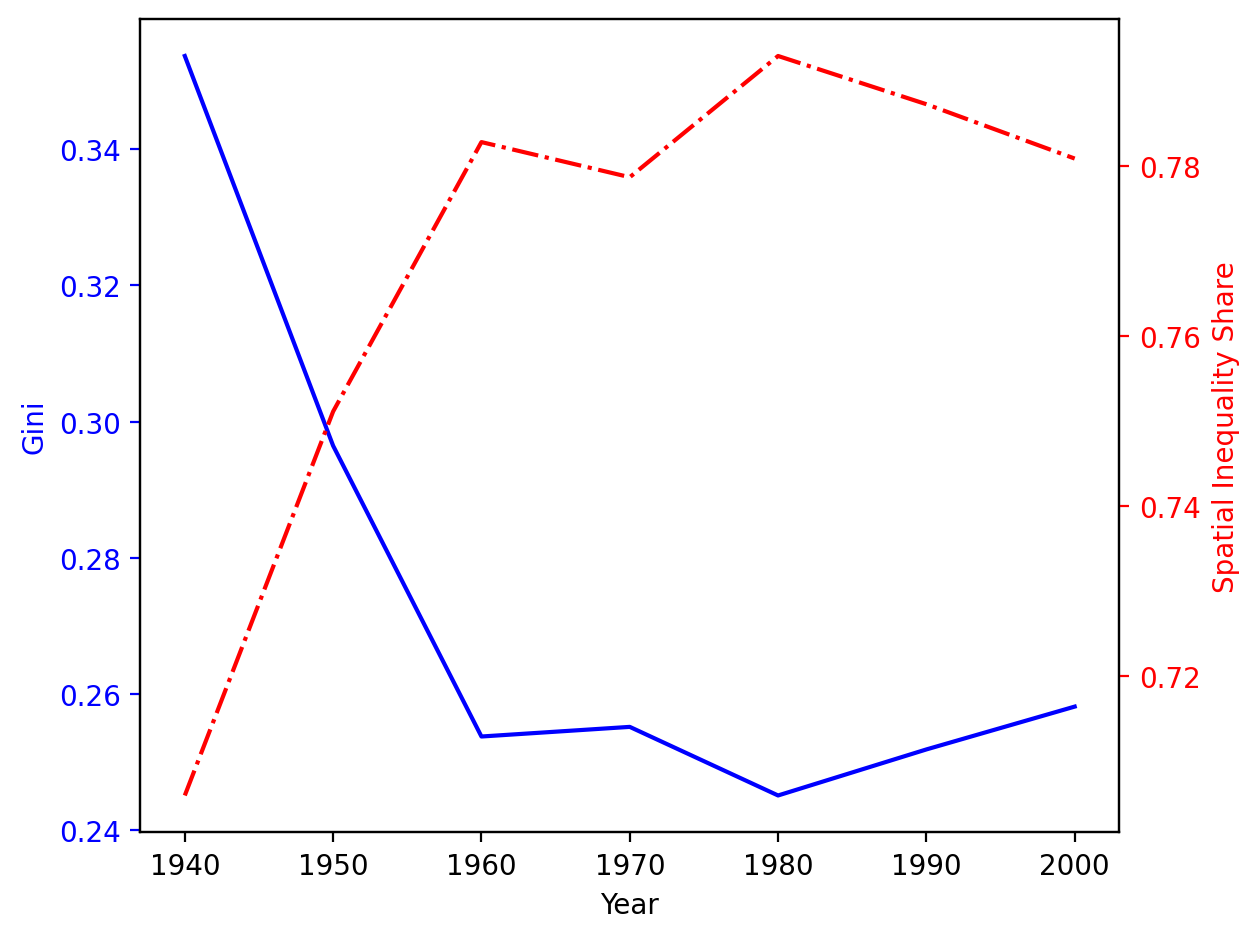

In [22]:
fig, ax1 = plt.subplots()
t = years
s1 = ginis
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Year")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel("Gini", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
s2 = bgs
ax2.plot(t, s2, "r-.")
ax2.set_ylabel("Spatial Inequality Share", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()

# plt.savefig("share.png")

-----------------------